In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_palette('bright')
sns.set_context("talk")
sns.set_style("darkgrid")

In [6]:
df_10000 = pd.read_csv('preds_10000.csv')
df_10000.set_index(["Index"], inplace=True)

In [8]:
def get_df_with_dates(df):
    df_res = df.copy()
    list_date = []
    for elem in df_res.index:
        list_date.append(int(elem.split('_')[0]))
    df_res['date'] = list_date

    return df_res

In [9]:
df_dates = get_df_with_dates(df_10000)

In [10]:
df_dates

,Preds,Proba_A,Proba_nonA,date
Index,,,,
1909_Zevaco-Michel_Le-Pont-des-soupirs.txt_chunk_91,ADVENTURE,0.726407,0.273593,1909
1891_Maquet-Auguste_La-belle-Gabrielle_Tome-2.txt_chunk_70,NON_ADVENTURE,0.198741,0.801259,1891
1913_Delly_Entre-deux-ames.txt_chunk_5,NON_ADVENTURE,0.179648,0.820352,1913
1856_Dumas-Alexandre_Memoires-d-une-aveugle.txt_chunk_102,NON_ADVENTURE,0.223367,0.776633,1856
1869_Lautreamont-comte-de_Les-chants-de-Maldoror.txt_chunk_20,NON_ADVENTURE,0.482084,0.517916,1869
...,...,...,...,...
1864_Sand-George_Le-marquis-de-Villemer.txt_chunk_14,NON_ADVENTURE,0.185228,0.814772,1864
1891_Greville-Henry_Peril.txt_chunk_44,NON_ADVENTURE,0.049209,0.950791,1891
1869_Gaboriau-Emile_Monsieur-Lecoq_II.txt_chunk_127,NON_ADVENTURE,0.157921,0.842079,1869


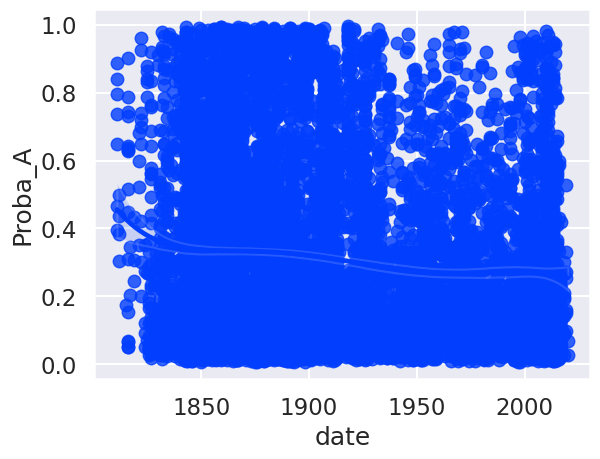

In [12]:
ax = sns.regplot(x='date', y='Proba_A', data=df_dates, order=5)

In [16]:
threshold = 0.5

In [105]:
result_df = df_dates.groupby(df_dates['date'])['Proba_A'].apply(lambda x: (x > threshold).sum() / len(x)).reset_index()

In [103]:
def plot_df(df):
    plt.figure(figsize=(9,6))
    ax = plt.subplot()

    ax = sns.regplot(x='date', y='Proba_A', data=df, order=5)

    ax.set_xlabel("Dates")
    ax.set_ylabel('Adventure scene frequency per year')

    plt.savefig('../img/chapitres_aventures.png', format='png', bbox_inches='tight', dpi=400)

    plt.show()

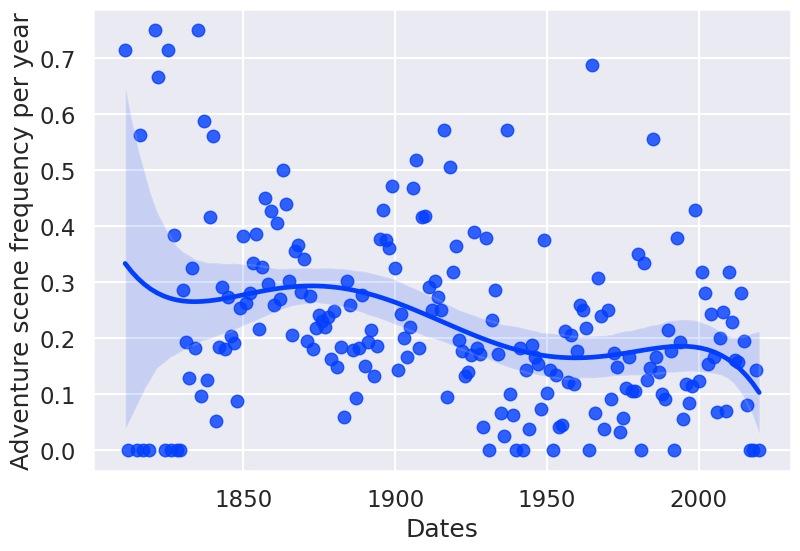

In [106]:
plot_df(result_df)

In [59]:
def calculate_ratio(df, column_name, threshold):
    # Initialize an empty list to store the results
    result_list = []

    # Group by the specified column
    grouped_df = df.groupby(df[column_name])

    # Iterate through the groups
    for group_name, group_data in grouped_df:
        # Calculate the ratio for each group
        count_above_threshold = (group_data['Proba_A'] > threshold).sum()
        total_count = len(group_data)
        ratio = count_above_threshold / total_count

        # Append the results to the list
        result_list.append({column_name: group_name, 'Proba_A': ratio})

    # Convert the list of dictionaries to a DataFrame
    result_df = pd.DataFrame(result_list)

    return result_df


In [60]:
threshold = 0.5

In [61]:
temp_df = calculate_ratio(df_dates, 'date', threshold)

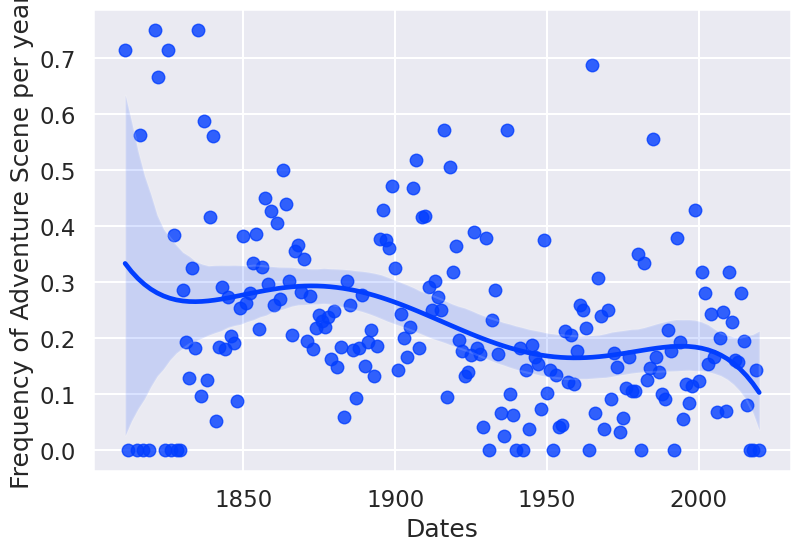

In [62]:
plot_df(temp_df)

### Per subgenres

In [63]:
df_corpus = pd.read_csv(r'/home/crazyjeannot/Documents/master/M2/master_thesis/meta_data/corpus.csv')
df_corpus.set_index(['doc_name'], inplace=True)

In [70]:
df_corpus.index[:2]

Index(['1861_Segur-comtesse-de_Pauvre-Blaise', '1845_Sand-George_Teverino'], dtype='object', name='doc_name')

In [73]:
def get_df_with_subgenre(df, df_corpus):
    df_res = df.copy()
    list_subgenre = []
    for elem in list(df_res.index):
        tmp = elem.split('.')[0]
        if tmp in list(df_corpus.index):
            list_subgenre.append(df_corpus.loc[tmp].genre)
        else:
            list_subgenre.append('')
    df_res['subgenre'] = list_subgenre

    return df_res

In [74]:
df_genred = get_df_with_subgenre(df_dates, df_corpus)

In [76]:
genres_ok = ["roman d'aventures",
'roman historique',
'policier',
'littérature jeunesse',
'mémoires et autobiographie',
'roman sentimental', 
'érotisme', 
'fantastique',
'science-fiction',
'récit de voyage']

In [77]:
df_genred = df_genred[df_genred.subgenre.isin(genres_ok)]

In [78]:
df_genred.head()

,Preds,Proba_A,Proba_nonA,date,subgenre
Index,,,,,
1909_Zevaco-Michel_Le-Pont-des-soupirs.txt_chunk_91,ADVENTURE,0.726407,0.273593,1909,roman d'aventures
1891_Maquet-Auguste_La-belle-Gabrielle_Tome-2.txt_chunk_70,NON_ADVENTURE,0.198741,0.801259,1891,roman d'aventures
1913_Delly_Entre-deux-ames.txt_chunk_5,NON_ADVENTURE,0.179648,0.820352,1913,roman sentimental
1946_Delly_Les-hiboux-des-roches-rouges.txt_chunk_22,NON_ADVENTURE,0.133192,0.866808,1946,roman sentimental
1859_Aimard-Gustave_L-eclaireur.txt_chunk_83,ADVENTURE,0.991364,0.008636,1859,roman d'aventures


In [80]:
result_df = df_genred.groupby(df_genred['subgenre']).apply(lambda group: ((group['Proba_A'] > threshold).sum() / len(group)) * 100)
result_df = result_df.reset_index(name='percentage_above_threshold')   

<Axes: xlabel='subgenre'>

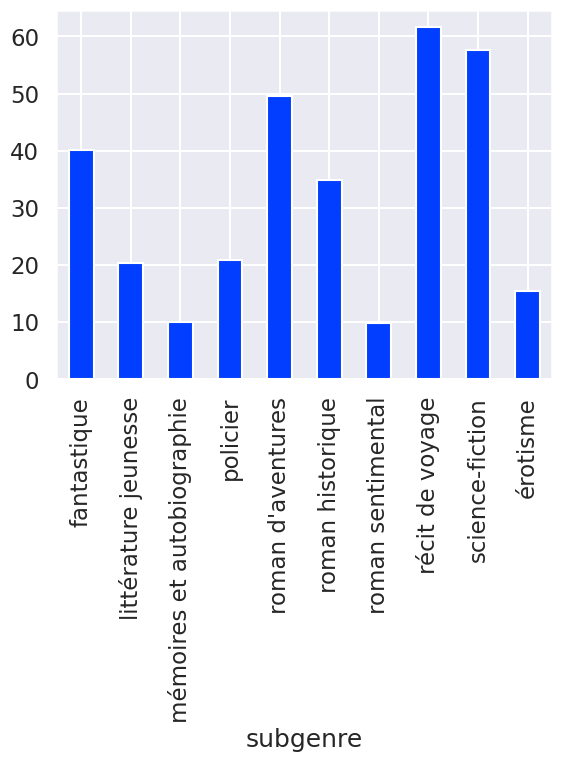

In [82]:
result_df.plot(kind='bar', x='subgenre', y='percentage_above_threshold', legend=False)

In [86]:
def plot_percentage_above_threshold(df, column_name, threshold):
    # Group by the specified column
    grouped_df = df.groupby(df[column_name])

    # Initialize lists to store subgenres and corresponding percentages
    subgenres = []
    percentages = []

    # Iterate through the groups
    for group_name, group_data in grouped_df:
        # Calculate the percentage for each group
        count_above_threshold = (group_data['Proba_A'] > threshold).sum()
        total_count = len(group_data)
        percentage = (count_above_threshold / total_count) * 100

        # Append the results to the lists
        subgenres.append(group_name)
        percentages.append(percentage)
        
    result_df = pd.DataFrame({column_name: subgenres, 'percentage_above_threshold': percentages})
    return result_df

In [87]:
threshold = 0.5

In [88]:
test_df = plot_percentage_above_threshold(df_genred, 'subgenre', threshold)

In [107]:
translated_labels =['fantasy',
"children",
'autobiography',
'detective',
'adventure',
'historical',
'sentimental',
'travelogue',
"science fiction", 
'erotica',]

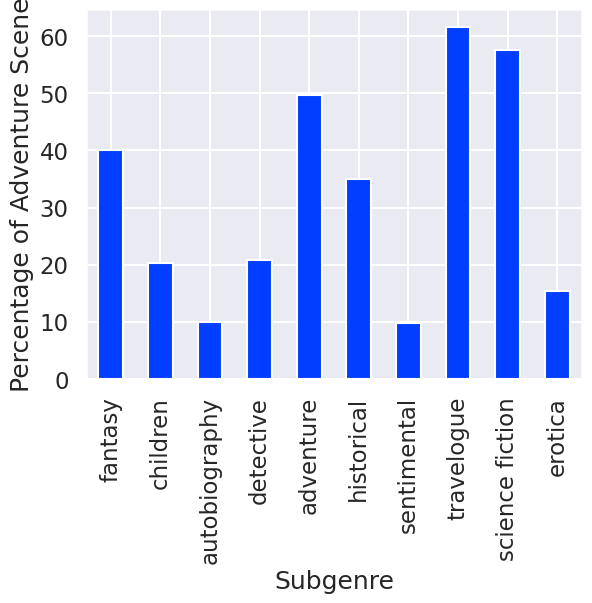

In [108]:
test_df.plot(kind='bar', x='subgenre', y='percentage_above_threshold', legend=False)
plt.xlabel('Subgenre')
plt.ylabel('Percentage of Adventure Scene')
loc = range(len(translated_labels))
plt.xticks(loc, translated_labels, rotation='vertical')

#plt.title(f'Percentage of proba_A > {threshold} for each Subgenre')

plt.savefig('../img/chapitres_subgenres_aventures.png', format='png', bbox_inches='tight', dpi=400)

plt.show()